In [1]:
import os

import lazy_pipe


os.environ["PATH"] += os.pathsep + './Graphviz/bin/'

['Output of C with Output of B with Output of A with Initial input for A']

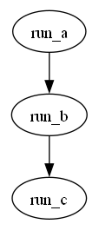

In [5]:
@lazy_pipe.task
def run_a(param):
    return f"Output of A with {param}"

@lazy_pipe.task
def run_b(a):
    return f"Output of B with {a}"

@lazy_pipe.task
def run_c(b):
    return f"Output of C with {b}"

a = run_a(param="Initial input for A")
b = run_b(a)
c = run_c(b)

simple_pipeline = lazy_pipe.Pipeline(
  input=a,
  outputs=[c]
)
lazy_pipe.visualize(simple_pipeline)
simple_pipeline.run()

['Output of F with Output of E with Output of D with Output of A with Initial input for A and Output of C with Output of B with Output of A with Initial input for A', 'Output from Exampleclass with Output of G with Output of C with Output of B with Output of A with Initial input for A']
['Output of F with Output of E with Output of D with Output of A with ###### New input for A and Output of C with Output of B with Output of A with ###### New input for A', 'Output from Exampleclass with Output of G with Output of C with Output of B with Output of A with ###### New input for A']
['Output of F with Output of E with Output of D with Output of A with @@@@@ New input for A and Output of C with Output of B with Output of A with @@@@@ New input for A', 'Output from Exampleclass with Output of G with Output of C with Output of B with Output of A with @@@@@ New input for A']


[A, B, C, D, ExampleClass.E, ExampleClass.F, ExampleClass.G, ExampleClass]

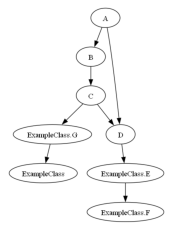

In [3]:

# Example task functions
@lazy_pipe.task
def A(param):
    return f"Output of A with {param}"

@lazy_pipe.task
def B(a):
    return f"Output of B with {a}"

@lazy_pipe.task
def C(b):
    return f"Output of C with {b}"

@lazy_pipe.task
def D(a, c):
    return f"Output of D with {a} and {c}"

# Example class with method tasks
class ExampleClass:
    @lazy_pipe.method_task
    def E(self, d):
        return f"Output of E with {d}"

    @lazy_pipe.method_task
    def F(self, e):
        return f"Output of F with {e}"

    @lazy_pipe.method_task
    def G(self, inp):
        return f"Output of G with {inp}"

    @lazy_pipe.method_task
    def __call__(self, inp):
        return f"Output from Exampleclass with {inp}"

# Define the data flow
a = A(param="Initial input for A")
b = B(a)
c = C(b)
d = D(a, c)

example = ExampleClass()
e = example.E(d)
f = example.F(e)
g = example.G(c)
ec = example(g)

# Create and run the pipeline
pipeline = lazy_pipe.Pipeline(input=a, outputs=[f, ec])
result = pipeline.run()
print(result)

# Run the pipeline with a different argument for A
new_result = pipeline.run(param="###### New input for A")
print(new_result)

new_result2 = pipeline.run(param="@@@@@ New input for A")
print(new_result2)

# Visualize the pipeline without saving
# pipeline.visualize()
lazy_pipe.visualize(pipeline)

# Visualize the pipeline and save as PNG
pipeline.tasks

In [7]:
new_result2 = pipeline.run(param="@@@@@ New input for A")
print(new_result2)

A is called
['Output of F with Output of E with Output of D with Output of A with @@@@@ New input for A and Output of C with Output of B with Output of A with @@@@@ New input for A', 'Output from Exampleclass with Output of G with Output of C with Output of B with Output of A with @@@@@ New input for A']
